In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('imdb-reviews-pt-br.csv')
dados.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


In [3]:
dados.drop(['id','text_en'], axis = 1, inplace = True)
dados.head()

,text_pt,sentiment
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,Este é um exemplo do motivo pelo qual a maiori...,neg
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,Filmes de fotos de latão não é uma palavra apr...,neg


In [4]:
target = dados['sentiment'].replace(['neg', 'pos'], [0,1])

In [5]:
dados['target'] = target
dados.head()

,text_pt,sentiment,target
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0
1,Este é um exemplo do motivo pelo qual a maiori...,neg,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0
3,Nem mesmo os Beatles puderam escrever músicas ...,neg,0
4,Filmes de fotos de latão não é uma palavra apr...,neg,0


In [6]:
dados.drop(['sentiment'], axis = 1, inplace = True)
dados.head()

,text_pt,target
0,"Mais uma vez, o Sr. Costner arrumou um filme p...",0
1,Este é um exemplo do motivo pelo qual a maiori...,0
2,"Primeiro de tudo eu odeio esses raps imbecis, ...",0
3,Nem mesmo os Beatles puderam escrever músicas ...,0
4,Filmes de fotos de latão não é uma palavra apr...,0


In [7]:
dados.shape

(49459, 2)

In [8]:

n = 3000
dados2 = dados.iloc[:n]

In [9]:
dados2.target.value_counts()

0    3000
Name: target, dtype: int64

In [10]:
n2 = 40000
n3 = 43000
dados3 = dados.iloc[n2:n3]

In [11]:
dados3.target.value_counts()

1    3000
Name: target, dtype: int64

In [12]:
#empilhando os DF
dados = dados2.append(dados3, ignore_index = True)

In [13]:
dados.shape

(6000, 2)

In [14]:
dados.target.value_counts()

0    3000
1    3000
Name: target, dtype: int64

In [15]:
comentarios = dados['text_pt'].tolist()

In [16]:
#deixando todas as palavras da lista como uma única string
comentarios_string =  ' '.join(comentarios)

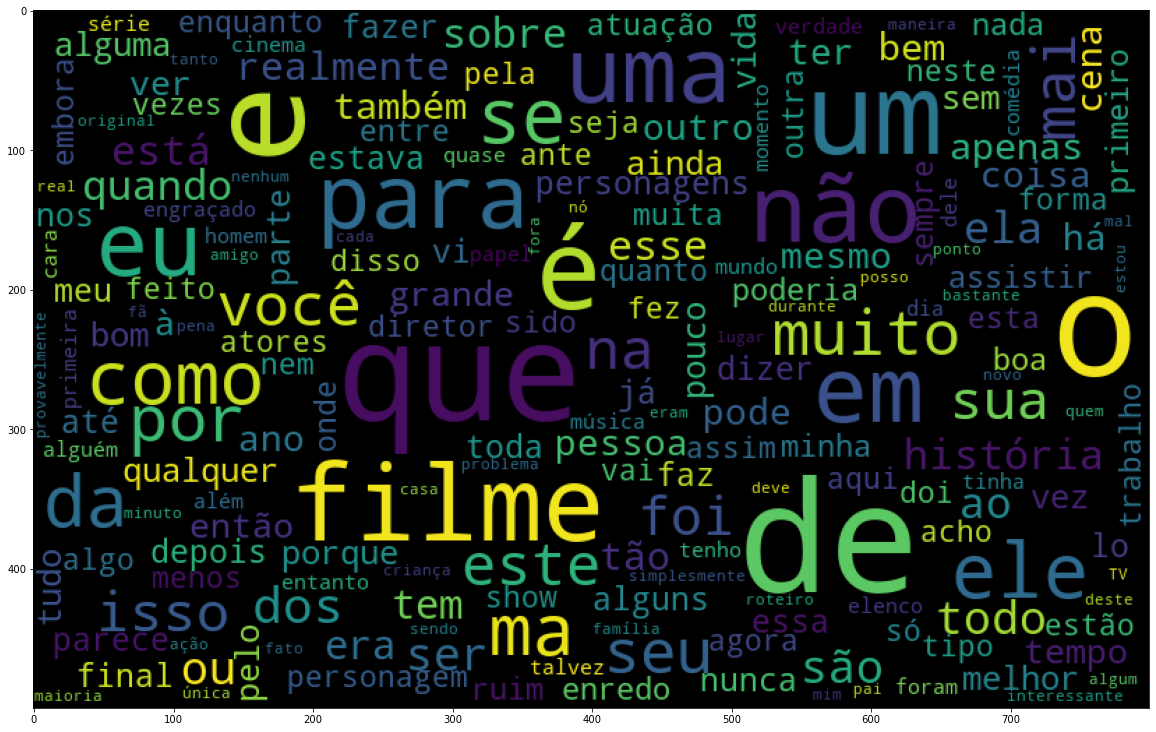

In [17]:
from wordcloud import WordCloud
plt.figure(figsize=(20,20))

plt.imshow(WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(comentarios_string));


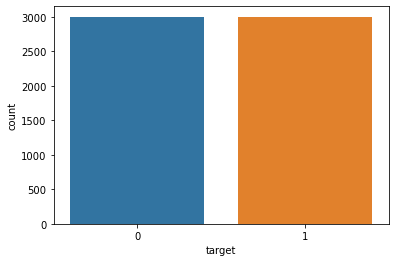

In [18]:
#anaytics
sns.countplot(x='target', data = dados);

### Tratamento do texto

- remover a pontuação dos textos com a função string punctuation
- remover stop words
- deixar todas as palavras em minúsculo
- tokenização das palavras

In [19]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\p_net\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
stopwords = nltk.corpus.stopwords.words('portuguese')
nltk.download('rslp')

[nltk_data] Downloading package rslp to
[nltk_data]     C:\Users\p_net\AppData\Roaming\nltk_data...
[nltk_data]   Package rslp is already up-to-date!


True

In [22]:
#adicionando palavras ao stopwords
stopwords.append('vou')
stopwords.append('tão')
stopwords.append('vai')
stopwords.append('assim')
stopwords.append('ainda')


In [23]:
print(stopwords)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

### Tokenização

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk import tokenize

In [25]:
token_space = tokenize.WhitespaceTokenizer()

In [26]:
# Transformando a coluna text_pt em String
print(type(dados['text_pt']))
dados['text_pt'] = dados['text_pt'].astype(str)

<class 'pandas.core.series.Series'>


In [27]:
#definindo uma função para tratar o texto


def limpar_texto(mensagem):
    text = [char for char in mensagem if char not in string.punctuation]
    text = ''.join(text)
    text = [word for word in text.split() if word.lower() not in stopwords]
    return text

In [28]:
from sklearn.feature_extraction.text import CountVectorizer


In [29]:
vectorizer = CountVectorizer(analyzer=limpar_texto)


In [30]:
reviews_countvectorizer = vectorizer.fit_transform(dados['text_pt'])

In [31]:
len(vectorizer.get_feature_names_out())

60058

In [32]:
# reviews_countvectorizer é uma matriz esparsa
reviews_countvectorizer

<6000x60058 sparse matrix of type '<class 'numpy.int64'>'
	with 611591 stored elements in Compressed Sparse Row format>

In [33]:
type(reviews_countvectorizer)

scipy.sparse.csr.csr_matrix

In [34]:
palavras = pd.DataFrame(reviews_countvectorizer.toarray(),
                      columns=vectorizer.get_feature_names_out())

In [35]:
palavras

,0,00,007,0079,007Eu,0080,0083,01,010,010215,...,“É,”,”A,”Bloodline,”Francamente,”Nesta,”Nosso,”O,”Piper,€
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
#removendo as palavras que começam com números
N = 675
first_n_column  = palavras.iloc[: , :N]

In [37]:
first_n_column

,0,00,007,0079,007Eu,0080,0083,01,010,010215,...,9s,9th,9ª,9º,A26,A2nd,AA,AAA,AAAAHHHHHH,AB
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
palavras = palavras.drop(first_n_column, axis = 1)

In [39]:
palavras.shape

(6000, 59383)

In [40]:
palavras

,ABAIXO,ABC,ABCafter,ABCcom,ABCs,ABRAHAM,ABSOLUTAMENTE,AC,ACABADO,ACADEMY,...,“É,”,”A,”Bloodline,”Francamente,”Nesta,”Nosso,”O,”Piper,€
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
i = 59341
f = 59383
last_n_column  = palavras.iloc[: , i:f]

In [42]:
last_n_column

,“10,“A,“Convite,“Debaixo,“Estou,“Eu,“Gramas,“Halloween”,“HeeHaw”,“Hoje,...,“É,”,”A,”Bloodline,”Francamente,”Nesta,”Nosso,”O,”Piper,€
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
palavras = palavras.drop(last_n_column, axis = 1)

In [44]:
dados = dados.drop(['text_pt'], axis = 1)

In [45]:
dados.head()

,target
0,0
1,0
2,0
3,0
4,0


In [46]:
#concatenando os DF
dados = pd.concat([dados, palavras], axis = 1)
dados.head()

,target,ABAIXO,ABC,ABCafter,ABCcom,ABCs,ABRAHAM,ABSOLUTAMENTE,AC,ACABADO,...,​​triste,​​têm,​​um,​​uns,​​usam,​​viram,​​vêm,​​às,​​árias,​​é
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
dados.target.value_counts()

0    3000
1    3000
Name: target, dtype: int64

### Divisão em treino e teste

In [48]:
X = dados.drop('target', axis = 1)
y = dados['target']

In [49]:
from sklearn.model_selection import train_test_split

SEED = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, stratify=y, random_state = SEED)

In [50]:
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [51]:
#regressão logística
'''from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=SEED)
lr.fit(X_train, y_train)
y_pred =lr.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))'''


'from sklearn.linear_model import LogisticRegression\n\nlr = LogisticRegression(random_state=SEED)\nlr.fit(X_train, y_train)\ny_pred =lr.predict(X_test)\n\nprint("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))\nprint("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))\nprint("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) \nprint("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average=\'macro\')))'

In [52]:
'''print(classification_report(y_test, y_pred))'''

'print(classification_report(y_test, y_pred))'

In [53]:
#Multinomial NB

from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred =mnb.predict(X_test)

print("Acurácia: {:.3}".format(metrics.accuracy_score(y_test, y_pred)))
print("Precisão: {:.3}".format(metrics.precision_score(y_test, y_pred)))
print("Recall: {:.3}".format(metrics.recall_score(y_test, y_pred))) 
print("F1: {:.3}".format(metrics.f1_score(y_test, y_pred, average='macro')))

Acurácia: 0.898
Precisão: 0.917
Recall: 0.874
F1: 0.898


In [54]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       900
           1       0.92      0.87      0.90       900

    accuracy                           0.90      1800
   macro avg       0.90      0.90      0.90      1800
weighted avg       0.90      0.90      0.90      1800



### Salvando o modelo

In [55]:
'''import pickle'''

'import pickle'

In [56]:
'''with open('classificador.pkl', 'wb') as f:
    pickle.dump([mnb, vectorizer], f)'''

"with open('classificador.pkl', 'wb') as f:\n    pickle.dump([mnb, vectorizer], f)"

In [57]:
'''with open('classificador.pkl', 'rb') as f:
    bayes, vec = pickle.load(f)'''

"with open('classificador.pkl', 'rb') as f:\n    bayes, vec = pickle.load(f)"

In [58]:
'''bayes'''

'bayes'

In [59]:
'''vec'''

'vec'